In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
# read trend data 
trend = pd.read_csv(".././../data/Google_trends/all_trend.csv",index_col ='Maand',parse_dates = True)

In [25]:
trend

,vegan
Maand,
2004-01-01,4
2004-02-01,0
2004-03-01,6
2004-04-01,0
2004-05-01,5
...,...
2022-08-01,80
2022-09-01,72
2022-10-01,70


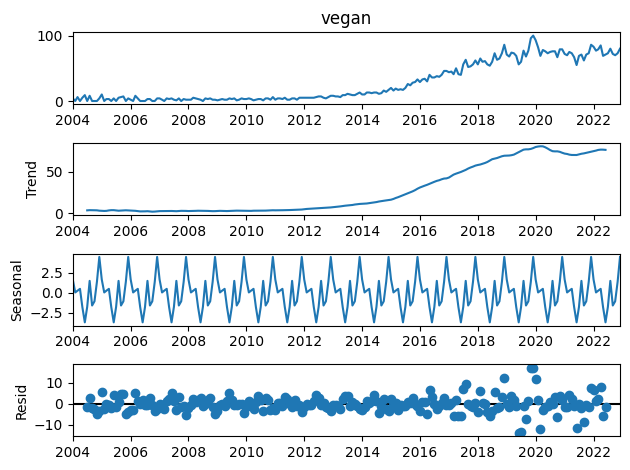

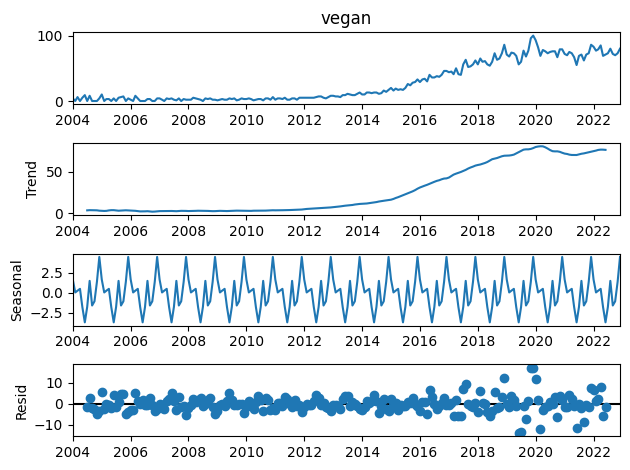

In [27]:
# ETS Decomposition
result = seasonal_decompose(trend['vegan'],period=None)
  
# ETS plot 
result.plot()

In [30]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(trend['vegan'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1259.587, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1376.629, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1292.855, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1262.437, Time=0.18 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1335.220, Time=0.10 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1260.663, Time=0.46 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1260.765, Time=0.94 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1276.777, Time=0.17 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1262.428, Time=1.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1272.718, Time=0.18 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1261.581, Time=0.48 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1261.581, Time=0.57 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1290.977, Time=0.11 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1260.064, Time=0.23 sec
 ARIMA(2,1,0)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  228
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -625.793
Date:                            Sun, 11 Dec 2022   AIC                           1259.587
Time:                                    09:18:53   BIC                           1273.070
Sample:                                01-01-2004   HQIC                          1265.035
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2999      0.090      3.315      0.001       0.123       0.477
ma.L1         -0.7066      0.068    -10.406      0.000      -0.840      -0.573
ma.S.L12      -0.6770      0.042    -15.960      0.000      -0.760      -0.594
sigma2        19.0622      1.397     13.647      0.000      16.325      21.800
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.04
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.30   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Split data into train / test sets
train = trend.iloc[:len(airline)-12]
test = trend.iloc[len(airline)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['# Passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()